# Assignment2+3-R

# Assignments 2+3 - Simple and Multiple Linear Regression (I+II)

# Overview of the steps

- Assignment 2:
1. Load the data and get an overview of the data
2. Perform simple linear regressions
3. Use the simple linear regression models
4. Perform multiple linear regressions
5. Use the multiple linear regression model
- Assignment 3:
6. Add interaction terms
7. Apply non-linear transformations to some predictors
8. Use qualitative predictors

# 1.2 Steps of Assignment 2 in detail

## 1.2.1 Load the data and get an overview of the data

Load the data file `Boston.csv`.

In [1]:

import pandas as pd
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy
import seaborn as sns
default_figsize=(8, 6)


boston_df = pd.read_csv('../ISLR/data/Boston.csv', index_col=[0])

/home/bogdan/lnu/4dv660/ml-practice/venv/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


Display the number of predictors (including the response medv) and their names:

In [2]:
print(len(boston_df.columns))
print(boston_df.columns)

14
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


Print a statistic summary of the predictors and the response `medv`:

In [3]:
boston_df.describe(include='all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Display the number of data points:

In [4]:
len(boston_df)

506

Display the data in a table:

> Top 20 rows are shown.

In [5]:
n = 20
display(boston_df.info(verbose=True))
display(boston_df.head(n))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


None

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


Plot some predictors (at least two) against the response values. We choose `lstat`, `rm`, and `age`.

In [6]:
default_alpha = .05
display(Markdown(f'### Significance level: {default_alpha}'))

def fit_lr(x, y):
    X = sm.add_constant(x)
    return sm.OLS(y, X).fit()

def plot(x, y, xlab, ylab, mod_fit=None, alpha=default_alpha):
    fig, ax = plt.subplots(figsize=default_figsize)
    ax.plot(x, y, 'yo')
    if mod_fit:
        X = sm.add_constant(x)
        regr = mod_fit.predict(X)
        ax.plot(x, regr, 'k')
        prediction = mod_fit.get_prediction(X)
        frame = prediction.summary_frame(alpha=alpha)
        zipped = pd.concat([x, frame.mean_ci_lower, frame.mean_ci_upper], axis=1)
        zipped.sort_values(x.name, inplace=True)
        ax.fill_between(zipped[x.name], zipped[frame.mean_ci_lower.name], zipped[frame.mean_ci_upper.name], color='k', alpha=.3)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    fig.show()

def format_pearsonr(values):
    return f'R = {values[0]}, p < {values[1]}'

def fit_lr_plot_full(x, y, xlab, ylab):
    mod_fit = fit_lr(x, y)
    print(format_pearsonr(scipy.stats.pearsonr(x, y)))
    plot(x, y, xlab, ylab, mod_fit)
    return mod_fit

### Significance level: 0.05

R = -0.737662726174015, p < 5.081103394386392e-88


<IPython.core.display.Javascript object>


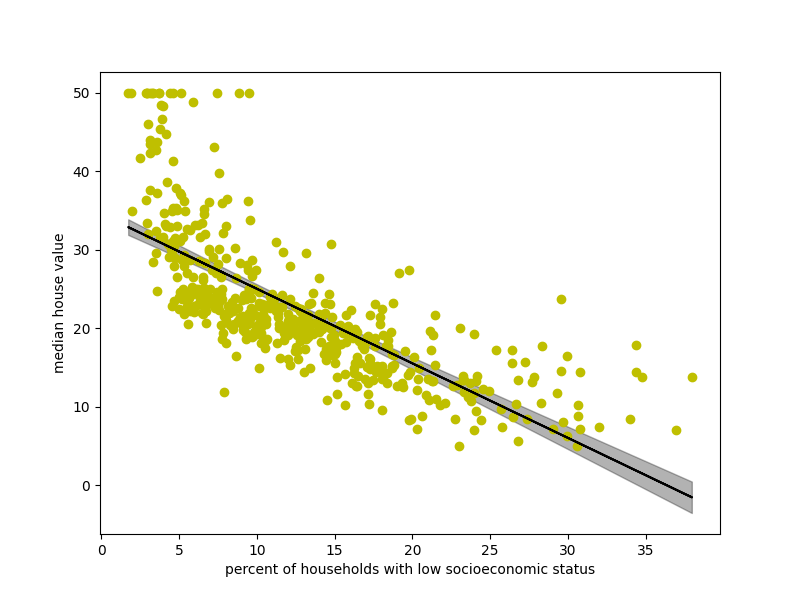

In [7]:
lstat_mod_fit = fit_lr_plot_full(boston_df['lstat'], boston_df['medv'], 'percent of households with low socioeconomic status', 'median house value')

R = 0.6953599470715394, p < 2.4872288710071593e-74


<IPython.core.display.Javascript object>


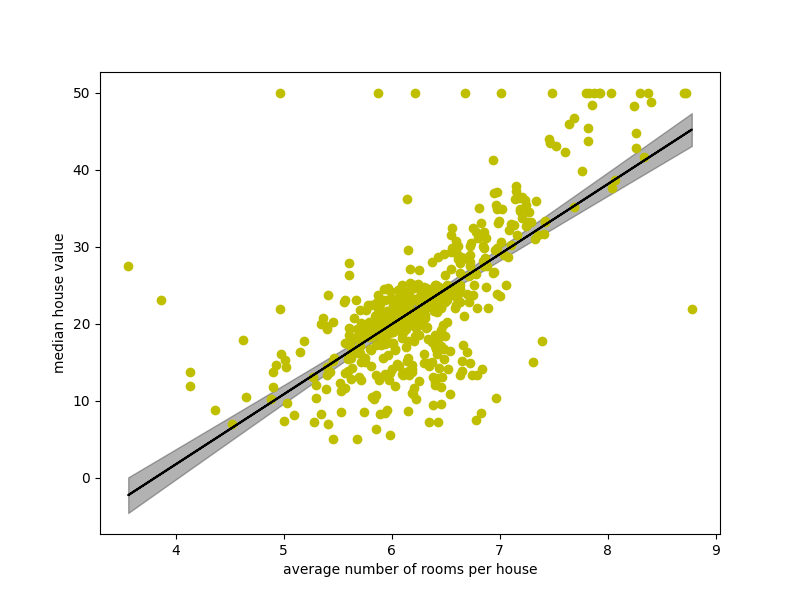

In [8]:
rm_mod_fit = fit_lr_plot_full(boston_df['rm'], boston_df['medv'], 'average number of rooms per house', 'median house value')

R = -0.3769545650045963, p < 1.5699822091877261e-18


<IPython.core.display.Javascript object>


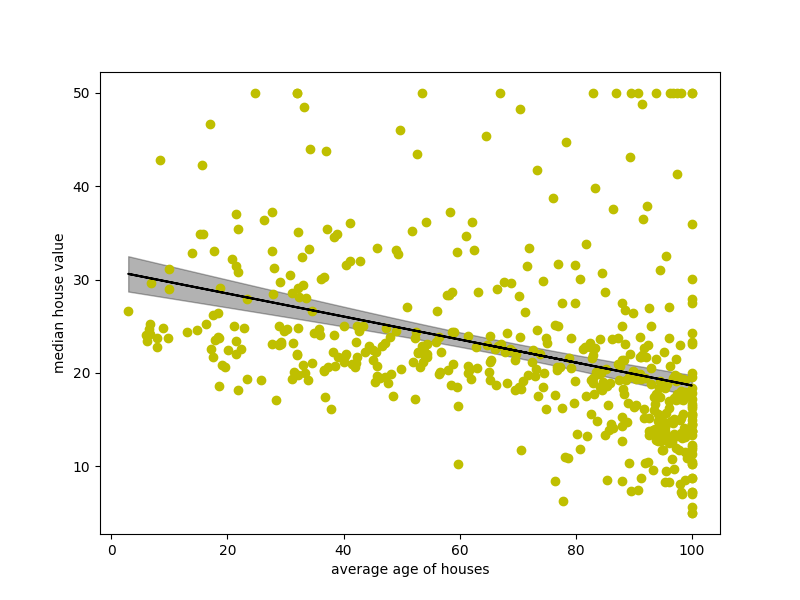

In [9]:
age_mod_fit = fit_lr_plot_full(boston_df['age'], boston_df['medv'], 'average age of houses', 'median house value')

## 1.2.2 Perform simple linear regressions
Fit a simple linear regression model, with `medv` as the response and some (at least two) predictors
individually. We choose `lstat`, `rm`, and `age`.

In [10]:
def print_lr(mod_fit):
    print(mod_fit.summary())
    print('Residuals:', mod_fit.resid.describe())

In [11]:
print_lr(lstat_mod_fit)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           5.08e-88
Time:                        00:41:40   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [12]:
print_lr(rm_mod_fit)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           2.49e-74
Time:                        00:41:40   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [13]:
print_lr(age_mod_fit)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           1.57e-18
Time:                        00:41:40   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9787      0.999     31.006      0.0

## Interprete the results
### Regression results interpretation of `medv` - median house value
Since the $R^{2}$ is calculated as $1 - \frac{RSS}{TSS}$, it, in simple words, shows how well the residual of each point is different against the mean residual value.
#### Against `lstat` - percent of households with low socioeconomic status
The slope is negative meaning that the function is decreasing and that there is a negative correlation. The value of the slope is close to -1 which means the slope angle is close to -45 degrees. All statements are confirmed by the chart.

The intercept equals approximately to 34.5 meaning the regression line is moved along the $y$ axis for 34 units, which is confirmed by the chart.

The Pearson correlation coefficient is approximately -0.74. This means that there is a correlation between `lstat` and `medv`. According to the value of the coefficient, most of the sample set is going to be densely inside an elliptic shape, which is prolonged along the `x` axis and turned down (negative slope). This information also mostly (except for $x$ values between 0 and 10) conforms to the chart.

The `p-value` is very small, which means there is a non-zero correlation between `lstat` and `medv`. So, the null-hypothesis that there is no correlation between `lstat` and `medv` has to be rejected.

The $R^{2}$ is 0.544, which means that the value is not too large for the model to fit too well and $R^{2}$ is not close to 0 which would mean the lack of explanation of `medv` by `lstat`.

So, according to $R^{2}$, there is a considerable degree of explanation between `medv` and `lstat`, but it is hard to tell if such value is good enough for this particular domain.

### Against `rm` - average number of rooms per house
The slope is positive meaning that the function is increasing and that there is a positive correlation. The value of the slope is 9.1 which means a steep positive slope. All statements are confirmed by the chart.

The intercept equals approximately to -34 meaning the regression line is moved along the negative direction of $y$ axis for 34 units, which is hard to confirm by the chart, but it is plausible.

The Pearson correlation coefficient is approximately 0.7. This means that there is a correlation between `rm` and `medv`. According to the value of the coefficient, most of the sample set is going to be densely inside an elliptic shape, which is prolonged along the `x` axis and turned up (positive slope). This information also mostly (except for $x$ values between 7.5 and 9) conforms to the chart.

The `p-value` is very small, which means there is a non-zero correlation between `rm` and `medv`. So, the null-hypothesis that there is no correlation between `rm` and `medv` has to be rejected.

The $R^{2}$ is 0.484, which means that the value is not too large for the model to fit too well and $R^{2}$ is not close to 0 which would mean the lack of explanation of `medv` by `rm`.

So, according to $R^{2}$, there is a considerable degree of explanation between `medv` and `rm`, but it is hard to tell if such value is good enough for this particular domain.

### Against `age` - average age of houses
The slope is negative meaning that the function is increasing and that there is a negative correlation. All statements are confirmed by the chart.

The intercept equals approximately to 31 meaning the regression line is moved along the $y$ axis for 31 units, which is confirmed by the chart.

The Pearson correlation coefficient is approximately -0.377. This means that there is a correlation between `age` and `medv`. According to the value of the coefficient, most of the sample set is going to be not very densely inside an almost round elliptic shape, which is still slightly prolonged along the `x` axis and turned down (negative slope). It is hard to make similar conclusions from the chart.

The `p-value` is very small, which means there is a non-zero correlation between `age` and `medv`. So, the null-hypothesis that there is no correlation between `age` and `medv` has to be rejected.

The $R^{2}$ is 0.142, which means that the value is no strong explanation of `medv` by `age`.

Overall, it is unclear if there is a relation between `age` and `medv`. Perhaps, if linear regression is the best way to describe this relation.

Obtain a confidence interval for the coefficient estimates for the indivisual models

In [14]:
def confint(mod_fit, alpha=default_alpha):
    return mod_fit.conf_int(alpha).rename(columns={0: f'{alpha * 50}%', 1: f'{100 - alpha * 50}%'})

def describe_axes(x, y):
    df = pd.concat([x, y], axis=1)
    df = df.describe()
    df.loc['max - min'] = df.loc['max'] - df.loc['min']
    return df

In [15]:
display(Markdown('#### Linear Regression params:'), lstat_mod_fit.params)
display(Markdown('#### Confidence Intervals:'), confint(lstat_mod_fit))
display(Markdown('#### Axes Data Described:'), describe_axes(boston_df['lstat'], boston_df['medv']))

#### Linear Regression params:

const    34.553841
lstat    -0.950049
dtype: float64

#### Confidence Intervals:

,2.5%,97.5%
const,33.448457,35.659225
lstat,-1.026148,-0.873951


#### Axes Data Described:

,lstat,medv
count,506.000000,506.000000
mean,12.653063,22.532806
std,7.141062,9.197104
min,1.730000,5.000000
25%,6.950000,17.025000
50%,11.360000,21.200000
75%,16.955000,25.000000
max,37.970000,50.000000
max - min,36.240000,45.000000


In [16]:
display(Markdown('#### Linear Regression params:'), rm_mod_fit.params)
display(Markdown('#### Confidence Intervals:'), confint(rm_mod_fit))
display(Markdown('#### Axes Data Described:'), describe_axes(boston_df['rm'], boston_df['medv']))

#### Linear Regression params:

const   -34.670621
rm        9.102109
dtype: float64

#### Confidence Intervals:

,2.5%,97.5%
const,-39.876641,-29.464601
rm,8.278855,9.925363


#### Axes Data Described:

,rm,medv
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000
max - min,5.219000,45.000000


In [17]:
display(Markdown('#### Linear Regression params:'), age_mod_fit.params)
display(Markdown('#### Confidence Intervals:'), confint(age_mod_fit))
display(Markdown('#### Axes Data Described:'), describe_axes(boston_df['age'], boston_df['medv']))

#### Linear Regression params:

const    30.978678
age      -0.123163
dtype: float64

#### Confidence Intervals:

,2.5%,97.5%
const,29.015752,32.941604
age,-0.149647,-0.096679


#### Axes Data Described:

,age,medv
count,506.000000,506.000000
mean,68.574901,22.532806
std,28.148861,9.197104
min,2.900000,5.000000
25%,45.025000,17.025000
50%,77.500000,21.200000
75%,94.075000,25.000000
max,100.000000,50.000000
max - min,97.100000,45.000000


## Interprete the results
### Confidence interval interpretation of `medv` - median house value
A confidence interval of 95% was used. This means 2 lines vertically symmetrical around a regression line (top and bottom 2.5% intervals).

In order to make a conclusion about the confidence interval, it must be analysed against the Linear Regression parameters, taking into account the dataset characteristics.

The difference between min (5) and max (50) for the dependent variable `medv` is 45.
#### Against `lstat` - percent of households with low socioeconomic status
The intervals for `lstat` are rather small: a bit larger than 2 for intercept and around 0.3 for slope.

They can be considered small if compared against the difference between min (1.730000) and max (37.970000) values of `lstat` is 36.240000. Such behaviour can be explained by the fact that the points are tightly packed together, which can be seen from the chart.

Surprisingly, the standard deviation is rather high and both mean and quantiles tell that the data is denser at the beginning of the `lstat` data interval.
#### Against `rm` - average number of rooms per house
The intervals for `rm` are:
- relatively large for intercept - around 10;
- relatively average for slope - around 1.7.

They can be considered large if compared against the difference between min (3.561000) and max (8.780000) values of `rm` is 5.219000. Such behaviour can be explained by a large number of outliers. A not small standard deviation confirms this.
#### Against `age` - average age of houses
The intervals for `age` are rather small: a bit larger than 3 for intercept and around 0.05 for slope.

They can be considered small if compared against the difference between min (2.900000) and max (100.000000) values of `age` is 97.100000. Such behaviour can be explained by the fact that the points are tightly packed together near the end of the age interval, which can be seen from the chart.

Surprisingly, the standard deviation is rather high which can be partially explained by uneven dispensation of points around the $x$ axis.

## 1.2.3 Use the simple linear regression models

Predict the `medv` response values for some selected predictor values. Calculate the prediction intervals for these values.

In [18]:
def predict_with_pi(mod_fit, x, alpha=default_alpha, xlab='x', ylab='y'):
    X = sm.add_constant(x)# if isinstance(x, pd.Series) else x
    # if len(X.columns) > 1:
    #     X = X.transpose()
    regr = mod_fit.predict(X)
    regr_info = mod_fit.get_prediction(X).summary_frame(alpha=alpha)

    if isinstance(x, pd.DataFrame) and len(x.columns) > 1:
        xlab = '+'.join(x.columns)
        x = x.apply(lambda r: '; '.join(str(v) for v in r), axis=1, result_type='reduce').squeeze()
    df = pd.concat([pd.Series(x), pd.Series(regr), regr_info.obs_ci_lower, regr_info.obs_ci_upper], axis=1, keys=[xlab, ylab, ylab + '_lwr', ylab + '_upr'])
    df.set_index(xlab, inplace=True)
    return df

In [19]:
display(Markdown('#### Prediction:'), predict_with_pi(lstat_mod_fit, (5, 10, 15), xlab='lstat', ylab='medv'))
display(Markdown('#### Axes Data Described:'), describe_axes(boston_df['lstat'], boston_df['medv']))

#### Prediction:

,medv,medv_lwr,medv_upr
lstat,,,
5,29.803594,17.565675,42.041513
10,25.053347,12.827626,37.279068
15,20.303101,8.077742,32.528459


#### Axes Data Described:

,lstat,medv
count,506.000000,506.000000
mean,12.653063,22.532806
std,7.141062,9.197104
min,1.730000,5.000000
25%,6.950000,17.025000
50%,11.360000,21.200000
75%,16.955000,25.000000
max,37.970000,50.000000
max - min,36.240000,45.000000


In [20]:
display(Markdown('#### Prediction:'), predict_with_pi(rm_mod_fit, (5, 6.5, 8), xlab='rm', ylab='medv'))
display(Markdown('#### Axes Data Described:'), describe_axes(boston_df['rm'], boston_df['medv']))

#### Prediction:

,medv,medv_lwr,medv_upr
rm,,,
5.0,10.839924,-2.214474,23.894322
6.5,24.493088,11.480391,37.505784
8.0,38.146251,25.058353,51.234149


#### Axes Data Described:

,rm,medv
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000
max - min,5.219000,45.000000


In [21]:
display(Markdown('#### Prediction:'), predict_with_pi(age_mod_fit, (25, 50, 75), xlab='age', ylab='medv'))
display(Markdown('#### Axes Data Described:'), describe_axes(boston_df['age'], boston_df['medv']))

#### Prediction:

,medv,medv_lwr,medv_upr
age,,,
25,27.899610,11.090368,44.708852
50,24.820542,8.043748,41.597335
75,21.741474,4.971031,38.511917


#### Axes Data Described:

,age,medv
count,506.000000,506.000000
mean,68.574901,22.532806
std,28.148861,9.197104
min,2.900000,5.000000
25%,45.025000,17.025000
50%,77.500000,21.200000
75%,94.075000,25.000000
max,100.000000,50.000000
max - min,97.100000,45.000000


## Interprete the results
### Prediction interval interpretation of `medv` - median house value
The significance level (alpha) is 95%. By definition, the prediction interval shows the range in which the values for the given independent variable will be with alpha (95%) level of certainty.

To draw conclusions from the prediction intervals, the prediction intervals have to be compared against the training data, specifically minimum and maximum values.
#### Against `lstat` - percent of households with low socioeconomic status
The prediction interval for `lstat` is large, around 24.5 for all 3 values. It is more than half a range of `medv` values, according to the analysis of the axes. It means there is a high dispersion of the dependent variable values for close independent variable values.
#### Against `rm` - average number of rooms per house
The prediction interval for `rm` is large, around 26.3 for all 3 values. It is more than half a range of `medv` values, according to the analysis of the axes. It means there is a high dispersion of the dependent variable values for close independent variable values.
#### Against `age` - average age of houses
The prediction interval for `age` is large, around 33.4 for all 3 values. It is more than half a range of `medv` values, according to the analysis of the axes. It means there is a high dispersion of the dependent variable values for close independent variable values.

## 1.2.4 Perform multiple linear regressions
Fit `medv` as response with the predictors selected before altogether.

In [22]:
multi_mod_fit = ols('medv~lstat+rm+age', boston_df).fit()
print_lr(multi_mod_fit)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     296.2
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          1.20e-110
Time:                        00:41:40   Log-Likelihood:                -1582.4
No. Observations:                 506   AIC:                             3173.
Df Residuals:                     502   BIC:                             3190.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1753      3.182     -0.369      0.7

#### Interprete the results.
Firstly, the $p\:values$ for all independent variables show that `lstat` and `rm` variables are significant (`P>|t|` is 0 meaning there is a 0 probability that the null hypothesis about lack of correlation can be rejected).

The `age` variable, on the other hand, has a high $p\:value$. This means that this variable is insignificant, and it can be safely removed.

Also, intercept also has a high $p\:value$, which means the current intercept might not be a right value, the regression line might have to move along the $y$ axis.

Taking everything into consideration, there might be a correlation between the variables, which can have an adverse effect on the precision of the linear regression model.

## Fit `medv` as response with all available predictors altogether.

In [23]:
def allf(df, y=None):
    return '+'.join(c for c in df.columns if c != y)

In [24]:
all_mod_fit = ols('medv~' + allf(boston_df, 'medv'), boston_df).fit()
print_lr(all_mod_fit)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          6.72e-135
Time:                        00:41:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

## Interprete the results.
Only variables which have $p\:value<0.05$ can be considered significant (the null hypothesis about lack of correlation between the independent and dependent variables can be rejected).

According to the linear regression model summary and $p\:values$ of the variables, all variables, except `indus` and `age` are significant. There might also be a correlation between the independent variables, which might adversely affect the precision of the model.

## Check the correlation between the predictors.

In [25]:
def corrmat(df, ylab, render=display):
    """Does not do symbol-coded chart."""
    def pearsonr_pval(x,y):
        return scipy.stats.pearsonr(x,y)[1]
    df = df.drop(ylab, axis=1)
    render(Markdown('Pearson:'))
    corr = df.corr(method='pearson')
    render(corr)
    render(Markdown('P values:'))
    render(df.corr(method=pearsonr_pval))
    render(Markdown('Pearson (chart):'))
    fig, ax = plt.subplots(figsize=default_figsize)
    sns.heatmap(corr.round(2), ax=ax, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
    fig.show()


Pearson:

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


P values:

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
crim,1.000000e+00,5.506472e-06,1.450349e-21,0.209435,3.751739e-23,6.346703e-07,2.854869e-16,8.519949e-19,2.693844e-56,2.357127e-47,2.942922e-11,2.487274e-19,2.654277e-27
zn,5.506472e-06,1.000000e+00,1.289161e-38,0.337810,7.231578e-36,6.935337e-13,7.575575e-45,9.748287e-66,6.988109e-13,4.385492e-13,5.325074e-20,7.207719e-05,2.908736e-22
indus,1.450349e-21,1.289161e-38,1.000000e+00,0.157463,7.913361e-98,5.328458e-20,8.409642e-61,3.586280e-78,8.368289e-50,3.018199e-82,3.774843e-19,1.184586e-16,1.381948e-51
chas,2.094345e-01,3.378103e-01,1.574628e-01,1.000000,4.029050e-02,4.018410e-02,5.177446e-02,2.568848e-02,8.686789e-01,4.244225e-01,6.203916e-03,2.733379e-01,2.258990e-01
nox,3.751739e-23,7.231578e-36,7.913361e-98,0.040291,1.000000e+00,3.818694e-12,7.452392e-86,4.233063e-100,3.342034e-53,1.093287e-66,1.885692e-05,7.816936e-19,5.979284e-49
rm,6.346703e-07,6.935337e-13,5.328458e-20,0.040184,3.818694e-12,1.000000e+00,4.459649e-08,3.237746e-06,1.918446e-06,2.086816e-11,1.610820e-16,3.906695e-03,1.033009e-53
age,2.854869e-16,7.575575e-45,8.409642e-61,0.051774,7.452392e-86,4.459649e-08,1.000000e+00,9.857534e-92,2.360876e-27,2.551067e-34,2.338885e-09,3.911801e-10,2.783924e-51
dis,8.519949e-19,9.748287e-66,3.586280e-78,0.025688,4.233063e-100,3.237746e-06,9.857534e-92,1.000000e+00,1.418269e-32,1.025931e-38,1.229920e-07,2.278649e-11,6.356331e-33
rad,2.693844e-56,6.988109e-13,8.368289e-50,0.868679,3.342034e-53,1.918446e-06,2.360876e-27,1.418269e-32,1.000000e+00,4.129920e-195,1.778554e-28,6.592918e-26,9.904457e-32
tax,2.357127e-47,4.385492e-13,3.018199e-82,0.424423,1.093287e-66,2.086816e-11,2.551067e-34,1.025931e-38,4.129920e-195,1.000000e+00,5.686833e-28,1.367562e-25,2.583867e-40


Pearson (chart):

<IPython.core.display.Javascript object>


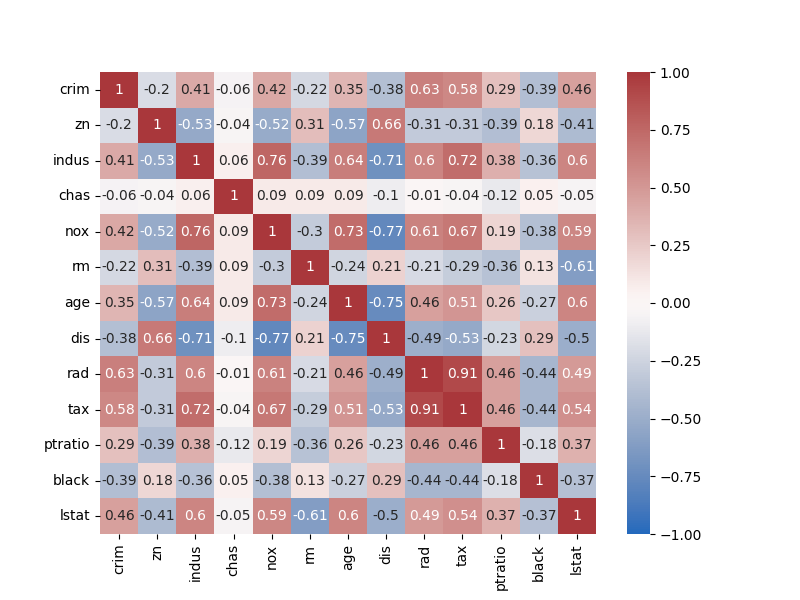

In [26]:
corrmat(boston_df, 'medv')

## Interprete the results.

It is obvious that the linear regression model is impaired due to strong correlation between the variables.

The weakest correlation is between `chas` and other variables. The strongest correlation is between `tax` and `rad` (positive). Other strong correlations include:
- positive: `indus` & `nox`, `indus` & `tax`, `nox` & `age`;
- negative: `indus` & `dis`, `nox` & `dis`, `age` & `dis`;

It has to be noted that the `age` variable has strong correlation with other variables, which confirms the large $p\:value$ for age during the Linear Regression `medv~lstat+rm+age` (see the interpretation above).

## 1.2.5 Use the multiple linear regression model
Predict the `medv` response values for some selected predictor values. Calculate the prediction intervals for these values.

In [27]:
lstat_x=pd.Series((5,10,15), name='lstat')
rm_x=pd.Series((5,6.5,8), name='rm')
X = pd.merge(lstat_x, rm_x, how='cross')

lstat_rm_mod_fit = ols('medv~lstat+rm', boston_df).fit()
display(Markdown('#### Prediction:'), predict_with_pi(lstat_rm_mod_fit, X, ylab='medv'))
display(Markdown('#### Axes Data Described:'), describe_axes(boston_df[['lstat', 'rm']], boston_df['medv']))

#### Prediction:

,medv,medv_lwr,medv_upr
lstat+rm,,,
5.0; 5.0,20.903875,9.889729,31.918021
5.0; 6.5,28.546057,17.635923,39.456192
5.0; 8.0,36.188239,25.225479,47.150999
10.0; 5.0,17.692084,6.722152,28.662016
10.0; 6.5,25.334266,14.437027,36.231505
10.0; 8.0,32.976448,21.995024,43.957872
15.0; 5.0,14.480292,3.537875,25.422709
15.0; 6.5,22.122474,11.221204,33.023745
15.0; 8.0,29.764656,18.747835,40.781477


#### Axes Data Described:

,lstat,rm,medv
count,506.000000,506.000000,506.000000
mean,12.653063,6.284634,22.532806
std,7.141062,0.702617,9.197104
min,1.730000,3.561000,5.000000
25%,6.950000,5.885500,17.025000
50%,11.360000,6.208500,21.200000
75%,16.955000,6.623500,25.000000
max,37.970000,8.780000,50.000000
max - min,36.240000,5.219000,45.000000


## Interprete the results.

The regression results with prediction interval have to be analyzed together with the data about the `medv` axis.

The prediction interval is around 21 - 22 which is less than it was for single-variable linear regression. This means that multiple-variable linear regression makes more sense in this context since the prediction by the single linear regression had slightly larger intervals.

# 1.3 Steps of Assignment 3 in detail

Check again the accuracy of the linear regression.

In [28]:
multi2_mod_fit = ols('medv ~ lstat+rm+nox+dis+ptratio', boston_df).fit()
print_lr(multi2_mod_fit)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          3.67e-131
Time:                        00:41:40   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.4992      4.613      8.129      0.0

## 1.3.1 Add interaction terms
Fit a model with interaction terms. Don’t forget to also include the plain predictors.
> Assuming `lstat*rm` has the same meaning in Python, since the used API is called ["Using R-style formulas"](https://www.statsmodels.org/dev/example_formulas.html).
> The regression coefficients match with the assignment.

In [29]:
inter_mod_fit = ols('medv~lstat*rm+nox+dis+ptratio', boston_df).fit()
print_lr(inter_mod_fit)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     290.8
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          2.48e-159
Time:                        00:41:40   Log-Likelihood:                -1459.9
No. Observations:                 506   AIC:                             2934.
Df Residuals:                     499   BIC:                             2963.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1518      4.880      0.646      0.5

## Interpret the results.
### Interpreting regression of `medv ~ lstat+rm+nox+dis+ptratio`.
The Ordinary Least Squares (OLS) regression without interaction terms has very good metrics. The residual plots are not analysed, but event residuals
 mean and quantiles look not very large meaning that the model is relatively good.

Both $R^2$ and $R^2\:adjusted$ are around 0.7 which is a good enough result for an OLS regression model. The probability of the F-statistic is very close to 0 meaning that the slope coefficients are meaningful and are different from 0.

$p\:values$ for all the coefficients, including intercept, are 0, which means there is a correlation between the independent variables and dependent variable. The Standard Errors for coefficients do not seem too large.
### Interpreting regression of `medv~lstat*rm+nox+dis+ptratio`.
After introducing interaction terms, the OLS regression model results changed slightly.

Most of the metrics are the same. However, 3 things are different:
- both $R^2$ and $R^2\:adjusted$ are now closer to 0.8, which means a better explanation of `medv` by new independent variables and term.
- $p\:value$ of the intercept is now larger than the significance level which means uncertainty of location of the regression line along the `medv` axis.
- the absolute values of residuals mean and quantiles seem to slightly decrease. It might be a good sign also.

Overall, the model with interaction terms seems to be slightly better than the previous one because $R^2$ and residuals can be considered more important than $p\:value$ of the intercept. However, it is still arguable that the new model is definitely better.

## 1.4 Apply non-linear transformations to some predictors
Fit a model with non-linear transformations of the predictor terms. Don’t forget to also include the plain predictors.
> The R formula is `medv~lstat*rm+I((lstat*rm)^2)+nox+dis+ptratio`. The operator `^` is replaced with `**` to accommodate Python syntax. So, the equivalent Python formula is `medv~lstat*rm+I((lstat*rm)**2)+nox+dis+ptratio`.

In [30]:
nonlin_mod_fit = ols('medv~lstat*rm+I((lstat*rm)**2)+nox+dis+ptratio', boston_df).fit()
print_lr(nonlin_mod_fit)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     253.9
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          8.05e-160
Time:                        00:41:40   Log-Likelihood:                -1455.8
No. Observations:                 506   AIC:                             2928.
Df Residuals:                     498   BIC:                             2961.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.5522 

The increase of $R^2$ and the low $p-value$ associated with the quadratic term suggests that it leads to an improved model. Use ANOVA to check if the quadratic fit is superior to the linear fit.

In [31]:
def anova(*mod_fits):
    # def anova_mapper(i, m):
    #     df = sm.stats.anova_lm(m, typ=2)
    #     df.rename(columns=(lambda c: f'#{i} {c}'), inplace=True)
    #     return df
    #
    # anova_res = (anova_mapper(i, m) for i, m in enumerate(mod_fits))
    # return pd.concat(anova_res, axis=1)
    return sm.stats.anova_lm(*mod_fits, typ=1)

In [32]:
anova(inter_mod_fit, nonlin_mod_fit)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,499.0,9500.381881,0.0,NaN,NaN,NaN
1,498.0,9348.435955,1.0,151.945925,8.094303,0.004623


## Interpret the results.
The `medv~lstat*rm+I((lstat*rm)**2)+nox+dis+ptratio` OLS regression model **B** with non-linear transformation is meant to be compared with the similar (previous) OLS regression model **A**, where the only difference is missing non-linear transformed interaction term (`medv~lstat*rm+nox+dis+ptratio`).
### Interpretation regression general metrics.
The coefficient of the term `I((lstat*rm)**2)` is close to zero meaning that this term might not contribute much to the `medv`.

The model B has very similar metrics to the previous model A. The $p-value$ of the intercept was considerably improved - it is now only slightly larger than the significance level. Moreover, both the $R^2$ and $adjusted\:R^2$ have higher values by 0.003. Other parameters did not change.
### ANOVA test results comparison.
The two-way I type ANOVA test results for two models show that the sum of squares of residuals was changed by 151 (1.5% if compared to 9500), which means there was an improvement in the model.

The $p-value$ is below the significance level and the $F-value$ is not close to 1 meaning that there is a difference between models.
### Conclusion.
The model B provides considerably less improvement over model A than model A provides over the model without interaction terms. In addition, the coefficient of the non-linear term is close to 0.

## Check if including additional polynomial terms, up to `N` order, lead to an improvement in the model fit.

In [33]:
def raw_poly(feature: str, degree: int):
    """Return the raw polynomial of `degree` for `feature`."""
    parts = []
    for i in range(1, degree + 1):
        parts.append(f'np.power({feature}, {i})')
    return '+'.join(parts)
    # return f'np.polynomial.polynomial.polypow({feature}, {degree})'
# poly = lambda x, degree : np.linalg.qr(np.vander(x, degree + 1)[:, ::-1])[0][:, 1:]

> It is unclear for me how to make orthogonal polynomial. Which algorithm is used in R and how can it be reproduced in Python (with numpy, preferably)?

In [34]:
poly5_mod_fit = ols(f'medv~lstat*rm+{raw_poly("lstat", 5)}+nox+dis+ptratio', boston_df).fit()
print_lr(poly5_mod_fit)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     188.0
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          1.80e-161
Time:                        00:41:40   Log-Likelihood:                -1443.5
No. Observations:                 506   AIC:                             2909.
Df Residuals:                     495   BIC:                             2956.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             33.9246      7

> I used raw (non-orthogonal) polynomial because I could not do otherwise.
> The coefficients for orthogonal polynomial in the assignment are larger than in my case.
> My model has similar metrics and other coefficients, so my guess is that I failed to put the constant coefficients for the orthogonal polynomial terms.

Use ANOVA to check if the quadratic fit is superior to the linear fit.

In [35]:
anova(inter_mod_fit, poly5_mod_fit)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,499.0,9500.381881,0.0,NaN,NaN,NaN
1,495.0,8903.772453,4.0,596.609428,8.292038,0.000002


## Interpret the results.
The `medv~lstat*rm+poly(lstat,5)+nox+dis+ptratio` OLS regression model **B** with non-linear transformation is meant to be compared with the OLS regression model **A**, where the difference is the missing non-linear transformed interaction terms (`medv~lstat*rm+nox+dis+ptratio`).
### Interpretation regression general metrics.
_Since I could not implement orthogonal polynomial, I will discuss coefficient for both my implementation and assignment. Note, that the metrics and results are similar for assignment model and my implementation which means they are equivalent._
- **Assignment model.** There are no coefficients which are close 0, which means that all terms are meaningful.
- **My model.** The terms for powers of 4 (`np.power(lstat, 4)`) and 5 (`np.power(lstat, 5)`) have coefficients, which are close to 0, which might mean that they do not contribute to the regression model.

The model B has very similar metrics to the previous model A. The $p-value$ of the intercept was considerably improved - it is lower than the significance level and very close to 0. Moreover, both the $R^2$ and $adjusted\:R^2$ have higher values by 0.014 and 0.012 respectively. Other parameters did not change.
### ANOVA test results comparison.
The two-way I type ANOVA test results for two models show that the sum of squares of residuals was changed by 596.6 (6.3% if compared to 9500), which means there was a considerable improvement in the model.

The $p-value$ is below the significance level and the $F-value$ is not close to 1 meaning that there is a difference between models.
### Conclusion.
The model B provides considerably more improvement over model A than model `medv~lstat*rm+I((lstat*rm)**2)+nox+dis+ptratio` provides over the model A. This means that introducing polynomials made sense. However, the coefficient of the terms with power 4 and 5 is close to 0.

## Fit and assess other non-linear transformations, e.g., $log(X)$

In [36]:
poly5log_mod_fit = ols(f'medv~{raw_poly("lstat", 5)}+rm+np.log(rm)+nox+dis+ptratio', boston_df).fit()
print_lr(poly5log_mod_fit)
display(Markdown('##### ANOVA:'))
anova(inter_mod_fit, poly5log_mod_fit)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          7.10e-168
Time:                        00:41:40   Log-Likelihood:                -1428.4
No. Observations:                 506   AIC:                             2879.
Df Residuals:                     495   BIC:                             2925.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            172.9866     13

##### ANOVA:

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,499.0,9500.381881,0.0,NaN,NaN,NaN
1,495.0,8386.756361,4.0,1113.62552,16.431997,1.190966e-12


> Like in the previous case, I did not use orthogonal polynomial because I do not know how.
This produced an equivalent model, but my coefficients near polynomial terms are different from the assignment model.
## Interpret the results.
The `medv~poly(lstat,5)+rm+log(rm)+nox+dis+ptratio` OLS regression model **B** with non-linear transformation is meant to be compared with the OLS regression model **A**, where the difference is the missing non-linear transformed interaction terms (`medv~lstat*rm+nox+dis+ptratio`).
### Interpretation regression general metrics.
_Since I could not implement orthogonal polynomial, I will discuss coefficient for both my implementation and assignment. Note, that the metrics and results are similar for assignment model and my implementation which means they are equivalent._
- **Assignment model.** There are no coefficients which are close 0, which means that all terms are meaningful.
- **My model.** The terms for powers of 4 (`np.power(lstat, 4)`) and 5 (`np.power(lstat, 5)`) have coefficients that are close to 0, which might mean that they do not contribute to the regression model.

The model B has very similar metrics to the previous model A. The $p-value$ of the intercept was considerably improved - it is lower than the significance level and very close to 0. Moreover, both the $R^2$ and $adjusted\:R^2$ have higher values by 0.026 and 0.025 respectively. Other parameters did not change.
### ANOVA test results comparison.
The two-way I type ANOVA test results for two models show that the sum of squares of residuals was changed by 1113.6 (11.5% if compared to 9500), which is a very good improvement in the model.

The $p-value$ is below the significance level and the $F-value$ is not close to 1 meaning that there is a difference between models.
### Conclusion.
The model B provides considerably more improvement over model A than model `medv~lstat*rm+poly(lstat,5)+nox+dis+ptratio` provides over the model A. This means that introducing logarthmic term and replacing the interaction term `lstat*rm` with `rm`. made sense. However, the coefficient of the terms with power 4 and 5 is close to 0.

## _Beat the teacher!_

The best model `medv~poly(lstat,5)+rm+log(rm)+nox+dis+ptratio` was taken as a base for experiments. Let us call it model **A**.

In order to make educated guesses about the data, pairwise relationships between data have to be built.

In [37]:
def pairplot(df, y, columns=4):
    # TODO: as plt.subplots()
    for i in range(0, len(df.columns), columns):
        sns.pairplot(df, x_vars=df.columns[i:i+columns], y_vars=[y])

<IPython.core.display.Javascript object>


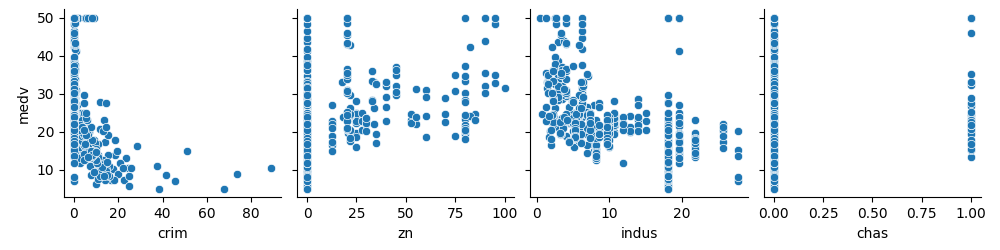

<IPython.core.display.Javascript object>


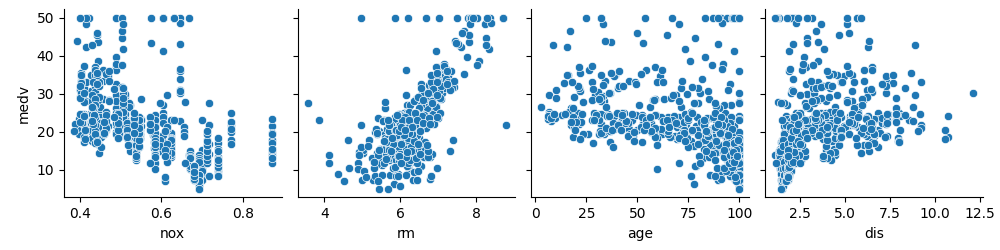

<IPython.core.display.Javascript object>


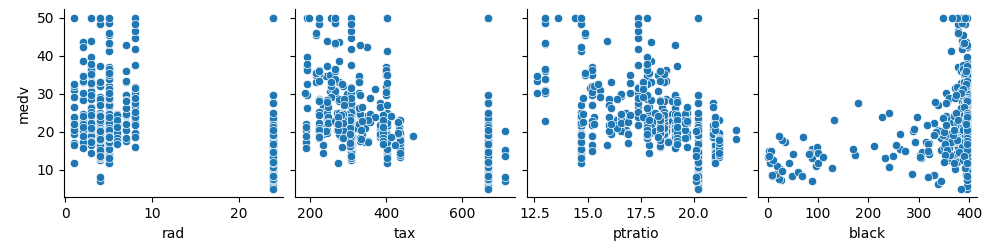

<IPython.core.display.Javascript object>


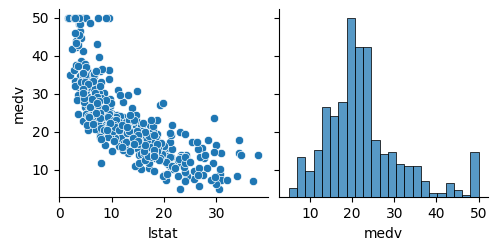

In [38]:
pairplot(boston_df, 'medv')

It is clear that `medv` has clear non-linear dependencies with `nox`, `dis,` and `lstat`. `lstat` is already described as a raw polynomial. So, an attempt has to be made to try raw polynomials for `nox` and `dis`.

In [39]:
my_mod_fit = ols(f'medv~{raw_poly("lstat", 5)}+rm+np.log(rm)+{raw_poly("nox", 7)}+{raw_poly("dis", 7)}+ptratio', boston_df).fit()
print_lr(my_mod_fit)
display(Markdown('##### ANOVA:'))
anova(inter_mod_fit, my_mod_fit)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     120.3
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          6.85e-177
Time:                        00:41:41   Log-Likelihood:                -1377.7
No. Observations:                 506   AIC:                             2799.
Df Residuals:                     484   BIC:                             2892.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.818e+04   2.02

##### ANOVA:

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,499.0,9500.381881,0.0,NaN,NaN,NaN
1,484.0,6865.784654,15.0,2634.597227,12.38164,3.483477e-26


After iteratively trying different degrees of polynomial for `nox` and `dis` the optimal results were achieved at degree 7 for both of the features. The result can be seen by sum of squares of residuals reduced by 2634.6 (28,8% if compared to 9500) and both $R^2$ and $adjusted\:R^2$ increased by more than 0.03. Other metrics do not have significant changes.

It is possible to achieve even better results, but there is already a risk of overfitting.

# 1.5 Use quantitative predictors

Therefore, we will now examine the Carseats data, which is part of the ISLR library. We will attempt to predict `Sales` (child car seat sales) in 400 locations based on a number of predictors.

Load the dataset and get an overview of the predictors.

In [40]:
carseats_df = pd.read_csv('../ISLR/data/Carseats.csv', index_col=[0])
carseats_df.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


There are quantitative predictors `ShelveLoc`, `Urban`, and `US`. Use them in a prediction model. For there quantitative predictors, `R` generates dummy variables.

In [41]:
cs_mod_fit = ols('Sales~' + allf(carseats_df, 'Sales'), carseats_df).fit()
print_lr(cs_mod_fit)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          1.60e-166
Time:                        00:41:41   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606    

## Interpret the results.
Both $R^2$ and $adjusted\:R^2$ are very high (above 0.87), which means a strong correlation between the features and the dependent variable.

$p-value$ for most of the independent variables is below the significance level, except for `Population`. The coefficient for `Population` is also close to 0, which means this variable might not contribute to the model. Overall, there are 4 independent variables with non-zero $p-value$.

The standard errors are small. The $F-statistic$ is not equal to 1, so the model is meaningful. Residuals are relatively small.

## Play around with the predictors. For instance:
Using the formula `Sales~.-Population-Education-Age-Urban-US +Income:Advertising +Price:Age`.

In [42]:
csplay_mod_fit = ols('Sales~' + allf(carseats_df, 'Sales') + '-Population-Education-Age-Urban-US +Income:Advertising +Price:Age', carseats_df).fit()
print_lr(csplay_mod_fit)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     328.2
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          2.90e-168
Time:                        00:41:41   Log-Likelihood:                -573.74
No. Observations:                 400   AIC:                             1165.
Df Residuals:                     391   BIC:                             1201.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.2991    

The $R^2$ and $adjusted\:R^2$ are slightly lower, but the $p-value$ for variables are lower, which means that the model is more stable, even if with lower correlation.

## _Beat the teacher!_

Again, the starting point for the analysis are going to be pairwise plots between `Sales` and independent variables to see possible non-linear relations.

<IPython.core.display.Javascript object>


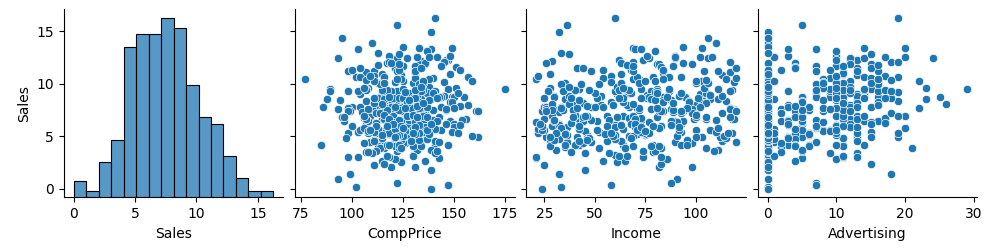

<IPython.core.display.Javascript object>


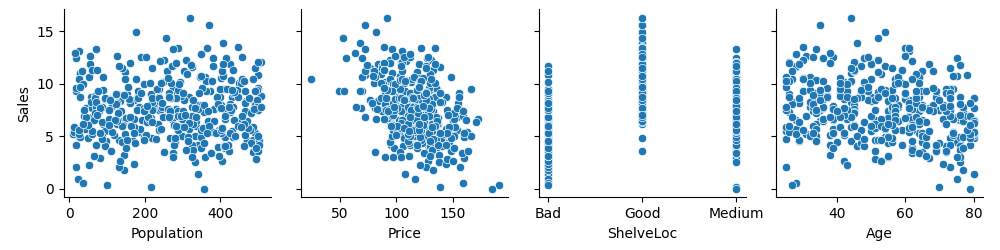

<IPython.core.display.Javascript object>


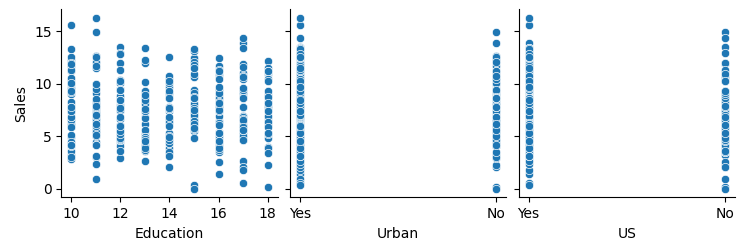

In [43]:
pairplot(carseats_df, 'Sales')

In [44]:
csmy_mod_fit = ols('Sales~' + allf(carseats_df, 'Sales') + '-Population-Education-Age-Urban-US +Income:Advertising +np.sqrt(Age)', carseats_df).fit()
print_lr(csmy_mod_fit)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     339.9
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          7.49e-171
Time:                        00:41:42   Log-Likelihood:                -567.63
No. Observations:                 400   AIC:                             1153.
Df Residuals:                     391   BIC:                             1189.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.8869    

As a starting point earlier suggested `Sales~.-Population-Education-Age-Urban-US +Income:Advertising +Price:Age` model was used.

It is hard to achieve a better model than already suggested. There have been done a lot of experiments, but almost all of them were ended with high $p-value$ for newly introduced terms. Overall, the starting model already had acceptable $p-value$ for independent variables and high $R^2$ and $adjusted\:R^2$.

**The optimal model is `Sales~. -Population-Education-Age-Urban-US +Income:Advertising +sqrt(Age)`.**

The first step to achieve this model was to try removing questionable terms and terms with non-zero $p-value$. As a result, only `Price:Age` was removed.

The next step was to experiment with different terms, but it gave a very limited success. So, eventually `sqrt(Age)` was added. This way $p-value$ for all independent variables remain close to 0 and both $R^2$ and $adjusted\:R^2$ are slightly increased by 0.004.